# Exercice 2.4-Python

On desire résoudre les deux équations différentielles ci-dessous pour t = 5000 s avec la méthode de Euler

$r(u,v,x,y,z) = A * u * x - B * y * z$

$\frac{du}{dt} = - r - \frac{D}{v} * u$

$\frac{dv}{dt} = D$

$\frac{dx}{dt} = - r + \frac{D}{v} * (10.93 - x)$

$\frac{dy}{dt} = r - \frac{D}{v} * y$

$\frac{dz}{dt} = r - \frac{D}{v} * z$

Avec $A$ = 9.00$\cdot$10<sup>-5</sup>, $B$ = 8.33$\cdot$10<sup>-5</sup>, $D$ = 0.05 pour $t \leq 4000$ s et $D = 0$ sinon.

## Solution

On commence par importer les bibliothèques nécessaires à la résolution du problème:
- le solveur odeint (dans scipy.integrate)
- numpy (pour le travail avec les matrices/vecteurs et les constantes mathématiques)
- pylab (pour l'affichage sur un graphique)

In [1]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pylab as plt

On définit ensuite nos constantes

In [2]:
# Constantes
A = 0.00009
B = 0.0000833
D = 0.05

# Conditions initiales
u0 = 7.72
v0 = 200
x0 = 0
y0 = 0
z0 = 0

Les équations différentielles sont définie dans une fonction:

In [3]:
def equations(variables, t, A, B, D):
    # On commence par récupérer les variables dans le bon ordre
    u, v, x, y, z = variables
  
    # On définit r comme dans la donnée
    r = A * u * x - B * y * z
    
    # Si t est supérieur à 4000, D prend la valeur de 0
    if t > 4000:
        D = 0
        
    # On définit les équations différencielles dans le bon ordre
    dudt = - r - D/v * u
    dvdt = D
    dxdt = - r + D/v * (10.93 - x)
    dydt = r - D/v * y
    dzdt = r - D/v * z
    
    # On retourne les équations différence sous la forme d'un vecteur
    return [dudt, dvdt, dxdt, dydt, dzdt]

Résoudre le problème à l'aide du solveur d'équations différentielles

In [4]:
 # Définir les conditions initiales et le domaine d'intégration
variables0 = [u0, v0, x0, y0, z0]
t = np.linspace(0, 5000, 5001) 


In [5]:
# On appelle solveur qui fait le travail de résolution pour nous
valeurs = odeint(equations, variables0, t, (A,B,D)) 

In [6]:
u = valeurs[:,0] # la 1ère colonne de valeurs correspond à u
v = valeurs[:,1]
x = valeurs[:,2]
y = valeurs[:,3]
z = valeurs[:,4]

Une fois que le problème est résolu, on peut faire de l'affichage

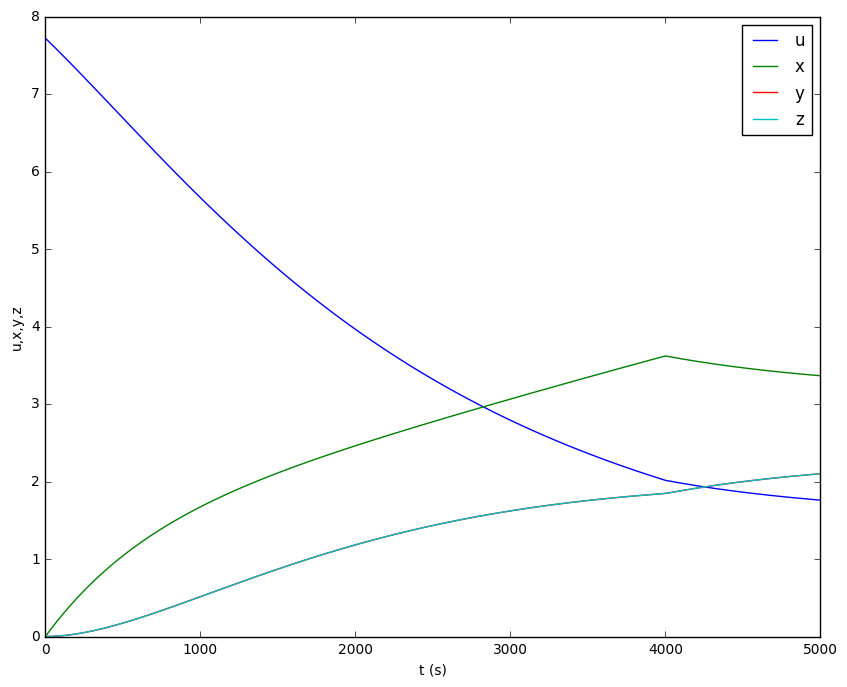

In [7]:
plt.figure(1, figsize=(10, 8), dpi=100)
plt.plot(t, u, t, x, t, y, t, z)
plt.xlabel('t (s)')
plt.ylabel('u,x,y,z')
plt.legend (['u','x','y','z'])


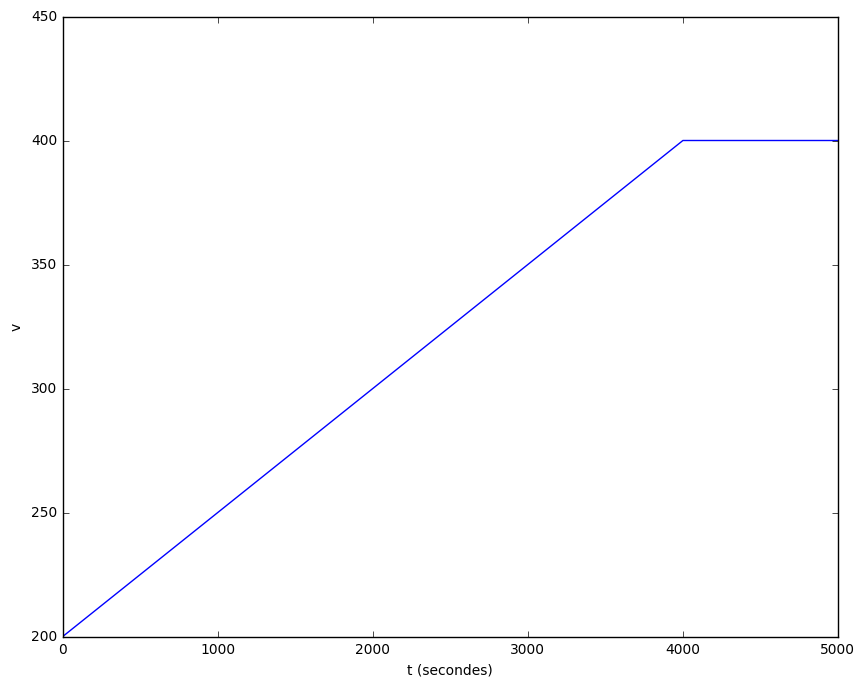

In [8]:
plt.figure(2, figsize=(10, 8), dpi=100)
plt.plot(t, v)
plt.xlabel('t (secondes)') 
plt.ylabel('v') 
